(7,)
1     03/11/1999
9     03/23/1999
19    04/07/1999
24    04/14/1999
30    04/22/1999
35    04/29/1999
41    05/07/1999
Name: date, dtype: object


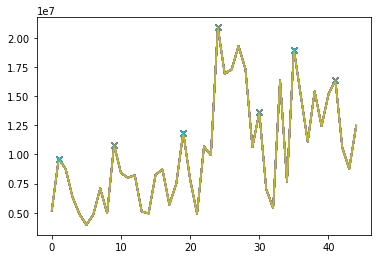

In [96]:
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
from scipy.signal import argrelextrema
from scipy.signal import find_peaks

err_allowed = 10.0/100
df = pd.read_table("E:/Stock Data/QQQ.txt", delimiter=',', parse_dates=True,
                   names=['date', 'time', 'open', 'high', 'low', 'close', 'volume'])

data = df
data = data.drop_duplicates(keep=False)
price = data.close.iloc[:45]
date = data.date.iloc[:45]

for i in range(5, len(price)):
    
    peaks, _ = find_peaks(price.values, distance=5)
#     peaks = find_peaks(price.values, distance=50)
    peak_idx = list(peaks)

#     max_idx = list(argrelextrema(price.values[:i], np.greater, order=5)[0]) # try np.greater_equal
    min_idx = list(argrelextrema(price.values[:i], np.less, order=5)[0])
    idx = peak_idx + min_idx +[len(price.values[:i])-1]
    idx.sort()

#     idx = max_idx + min_idx +[len(price.values[:i])-1]
#     print(idx)
#     idx.sort()
#     current_idx = idx[-3:]
    
#     print(idx)
#     current_pat = price.values[current_idx]

#     plt.plot(price.values[:i])
#     plt.plot(current_idx, current_pat, c='r')
#     plt.show()
    plt.plot(price.values)
    plt.plot(peaks, price.values[peaks], "x")
#     plt.plot(idx, price.values[idx], "m")
# idx = max_idx + min_idx + [len(price.values[:i]) - 1]
# idx.sort()
print(peaks.shape)
print(date[peaks])